In [1]:
import sys
sys.path.append("../")

In [2]:
from dataset import FFHQDegradationDataset
from transformation.transforms import get_transform_v3, get_transform_v2

import matplotlib.pyplot as plt
from torchvision.transforms import v2
import torch
import numpy as np

/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c106detail23torchInternalAssertFailEPKcS2_jS2_RKSs'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(
/home/lucas/miniconda3/envs/image-denoising/lib/python3.11/site-packages/torchvision/transforms/functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.transforms.v2.functional.
  warnings.warn(


In [3]:
ffhq_dataset = FFHQDegradationDataset(
    ffhq_path="/home/lucas/ffhq-dataset/images1024x1024/",
    transform=get_transform_v3(),
    noise_transform=get_transform_v2()
)

[ WARN:0@25.972] global loadsave.cpp:1329 imencode Unsupported depth image for selected encoder is fallbacked to CV_8U.


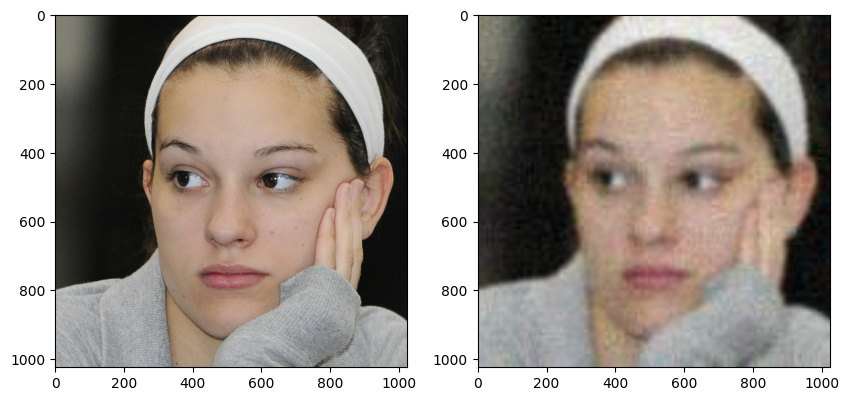

In [4]:
idx = 123

img_gt, img_lq = ffhq_dataset.__getitem__(123)

img_gt = np.transpose(img_gt,(1,2,0))
img_lq = np.transpose(img_lq,(1,2,0))

fig, ax = plt.subplots(1,2,figsize=(10,7))
ax[0].imshow(img_gt)
ax[1].imshow(img_lq)
plt.show()




In [46]:
train_transformer = v2.Compose([
    v2.ToDtype(dtype=torch.float32,scale=False),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [47]:
val_transformer = v2.Compose([
    v2.ToDtype(dtype=torch.float32,scale=False)
])

In [48]:
res_train = train_transformer(img_lq)

In [49]:
res_val = train_transformer(img_gt)

In [50]:
res_train

array([[[0.5254902 , 0.5254902 , 0.5254902 , ..., 0.0627451 ,
         0.0627451 , 0.0627451 ],
        [0.5254902 , 0.5254902 , 0.5254902 , ..., 0.0627451 ,
         0.0627451 , 0.0627451 ],
        [0.5254902 , 0.5254902 , 0.5254902 , ..., 0.0627451 ,
         0.0627451 , 0.0627451 ],
        ...,
        [0.6156863 , 0.6156863 , 0.6156863 , ..., 0.6431373 ,
         0.6431373 , 0.6431373 ],
        [0.6156863 , 0.6156863 , 0.6156863 , ..., 0.6431373 ,
         0.6431373 , 0.6431373 ],
        [0.6156863 , 0.6156863 , 0.6156863 , ..., 0.6431373 ,
         0.6431373 , 0.6431373 ]],

       [[0.5529412 , 0.5529412 , 0.5529412 , ..., 0.03921569,
         0.03921569, 0.03921569],
        [0.5529412 , 0.5529412 , 0.5529412 , ..., 0.03921569,
         0.03921569, 0.03921569],
        [0.5529412 , 0.5529412 , 0.5529412 , ..., 0.03921569,
         0.03921569, 0.03921569],
        ...,
        [0.63529414, 0.63529414, 0.63529414, ..., 0.67058825,
         0.67058825, 0.67058825],
        [0.6